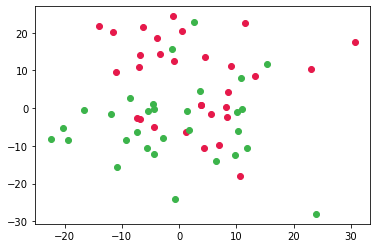

[[ 10.64324052 -18.00079983]
 [-10.95662143   9.69660506]
 [ -2.77535726  -7.92281797]
 [ 10.93299955  -0.11585962]
 [  8.31930004  -2.35126499]
 [  0.47659733  20.54369011]
 [-11.82625243  -1.44242862]
 [  4.57624962  13.49420582]
 [ -9.27048801  -8.54775487]
 [ -1.06746752  24.365547  ]
 [-13.98199988  21.88160601]
 [ -0.73757744 -24.07890938]
 [  8.51309149   4.35026987]
 [ 23.84725045 -28.02822129]
 [  6.98078443  -9.84664716]
 [ -6.2731504   21.38390447]
 [ -0.8476669   12.40018427]
 [ -4.46673585  -4.88115012]
 [-11.46706367  20.25995926]
 [ -1.324229    15.59663232]
 [  3.77001858   0.85136447]
 [  1.72078792  -5.80749507]
 [-20.23661941  -5.13422075]
 [ -8.55814303   2.70186858]
 [  6.46140328 -14.1080369 ]
 [  8.13419832   0.27317704]
 [  1.44001065  -0.78662226]
 [  5.52230855  -1.47503991]
 [ -4.33972084 -12.17911921]
 [ -4.32626475  -0.23678437]
 [ -7.26890464  -6.19936235]
 [-10.85394353 -15.56014395]
 [ 11.90916874 -10.44128876]
 [  4.32265824 -10.50368923]
 [  1.19972484

In [1]:
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
import sklearn.datasets
import sys
sys.path.append('..')
from utils import get_classification_data, show_data, visualise_predictions, colors

m = 60
n_features = 2
n_classes = 2
X, Y = get_classification_data(sd=10, m=60, n_clusters=n_classes, n_features=n_features)
show_data(X, Y)
print(X, Y)

In [18]:
class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None
    
    def insertLeft(self, node):
        self.left = node
        return node
    
    def insertRight(self, node):
        self.right = node
        return node

    def clearData(self):
        self.data = None
    
    def showData(self, node):
        if np.all(node.left.data):
            print("left: ", node.left.data)
        if np.all(node.right.data):
            print("right: ", node.right.data)
        if np.all(node.left.data) and np.all(node.right.data) and not node.data:
            return None
        self.showData(node.left)
        self.showData(node.right)


    

In [19]:
class classificationTree:
    def __init__(self,max_depth = 10):
        self.max_depth = max_depth

    def predict(self, X, y):       
        # define functions
        def find_best_split(X, y):
            best_feature_idx = 0
            best_impurity = 1
            splitPoint = 0
            for feature_idx, examples in enumerate(X.T): # loop through each feature
                current_impurity, current_splitpoint = find_best_split_on_feature(examples, y)
                # if this impurity is less than previous impurity, update best impurity, feature, and split point
                if current_impurity < best_impurity:
                    impurity = current_impurity
                    best_feature_idx = feature_idx
                    splitPoint = current_splitpoint
            return best_feature_idx, splitPoint, best_impurity
        
        def find_best_split_on_feature(x, y): # takes in a list of examples for one feature
            best_impurity = 1
            best_split_point = 0
            for i in range(len(x) - 1): # loop through Xs until X-1
                splitPoint = np.mean((x[i], x[i+1]))
                current_impurity = get_impurity(splitPoint, x, y)
                # if this impurity is less the previous impurity, update best impurity and best split point
                if current_impurity < best_impurity:
                    best_impurity = current_impurity
                    best_split_point = splitPoint
            return best_impurity, best_split_point

        
        def get_impurity(split_point, x, y): # get the impurity
            # print(x,y)
            left_labels = y[x < split_point]
            right_labels = y[x > split_point]
            p_squared = 0

            # run gini impurity for left side 
            for _class in np.unique(y): # gini_impurity_per_region()
                class_count = np.count_nonzero(left_labels == _class) 
                p_squared += (class_count/len(left_labels))**2
            left_side_impurity = 1 - p_squared

            # run gini impurity for right side
            p_squared = 0
            for _class in np.unique(y): # gini_impurity_per_region()
                class_count = np.count_nonzero(right_labels == _class) 
                p_squared += (class_count/len(right_labels))**2
            right_side_impurity = 1 - p_squared

            # return total gini impurity
            proportion_left = len(left_labels) / len(x)
            proportion_right = len(right_labels) / len(x)
            impurity = proportion_left * left_side_impurity + proportion_right * right_side_impurity
            return impurity 
            
        
        def grow_tree(node, y, depth): # recurring function to grow the tree
            # get split point with lowest impurity
            feature, split_point, impurity = find_best_split(node.data, y)   
            if impurity > 0 and depth < self.max_depth: # check if node.data.impurity is greater than 0
                # print(depth)
                X = node.data
                # put data of every feature into left_data if it is < split_point
                left_idx = X[:, feature] < split_point
                right_idx = X[:, feature] >= split_point
                left_data = np.array([row[left_idx] for row in X.T]).T
                left_y = y[left_idx]
                # put data of every feature into right_data if it is >= split_point 
                right_data = np.array([row[right_idx] for row in X.T]).T
                right_y = y[right_idx]
                # print(left_data, right_data)

                node.insertLeft(Node(left_data)) # insert left data into left node
                node.insertRight(Node(right_data)) # insert right data into right node
                node.clearData() # clearData in current node
                # run grow_tree() on left node and right node
                grow_tree(node.left, left_y, depth = depth + 1)
                grow_tree(node.right, right_y, depth = depth + 1) 
        # create root node, initialise depth, and grow the classification tree
        root = Node(X)
        depth = 0
        grow_tree(root, y, depth)
        
        return root

    

In [20]:
model = classificationTree(3)
root = model.predict(X, Y)
root.showData(root)

left:  [[ 10.64324052 -18.00079983]
 [ -0.73757744 -24.07890938]
 [ 23.84725045 -28.02822129]
 [  6.98078443  -9.84664716]
 [  6.46140328 -14.1080369 ]
 [ -4.33972084 -12.17911921]
 [-10.85394353 -15.56014395]
 [ 11.90916874 -10.44128876]
 [  4.32265824 -10.50368923]
 [ -5.66059673 -10.50360969]
 [  9.73108984 -12.39968609]]
right:  [[ -2.77535726  -7.92281797]
 [ -9.27048801  -8.54775487]
 [  1.72078792  -5.80749507]
 [-20.23661941  -5.13422075]
 [ -7.26890464  -6.19936235]
 [  1.19972484  -6.28457061]
 [-22.43876288  -8.27111227]
 [-19.35906057  -8.42680996]
 [ 10.31178105  -6.07356638]]
left:  [[ 8.31930004 -2.35126499]
 [-4.46673585 -4.88115012]
 [-6.75911458 -2.82999041]
 [-7.33112218 -2.65418696]]
right:  [[ 10.93299955  -0.11585962]
 [-11.82625243  -1.44242862]
 [  8.51309149   4.35026987]
 [  3.77001858   0.85136447]
 [ -8.55814303   2.70186858]
 [  8.13419832   0.27317704]
 [  1.44001065  -0.78662226]
 [  5.52230855  -1.47503991]
 [ -4.32626475  -0.23678437]
 [ -5.40857456  -0